# EQUITY FIXED LOOKBACK

Valuation and Risk of Equity Fixed Lookback Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat
from financepy.products.equity.equity_fixed_lookback_option import EquityFixedLookbackOption
from financepy.models.black_scholes import BlackScholes

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Fixed Lookback Option

I create a fixed lookback call and put option

In [3]:
expiry_dt = Date(1, 1, 2021)

In [4]:
strike_price = 105.0

In [5]:
opt_typeCall = OptionTypes.EUROPEAN_CALL
opt_typePut = OptionTypes.EUROPEAN_PUT

In [6]:
lookbackCall = EquityFixedLookbackOption(expiry_dt, opt_typeCall, strike_price)
lookbackPut = EquityFixedLookbackOption(expiry_dt, opt_typePut, strike_price)

In [7]:
print(lookbackCall)

OBJECT TYPE: EquityFixedLookbackOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 105.0
OPTION TYPE: OptionTypes.EUROPEAN_CALL


In [8]:
print(lookbackPut)

OBJECT TYPE: EquityFixedLookbackOption
EXPIRY DATE: 01-JAN-2021
STRIKE PRICE: 105.0
OPTION TYPE: OptionTypes.EUROPEAN_PUT


## Valuation

In [9]:
value_dt = Date(1, 1, 2020)

In [10]:
interest_rate = 0.10

In [11]:
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [12]:
dividend_yield = 0.0

In [13]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [14]:
volatility = 0.10

In [15]:
num_paths = 10000
num_steps_per_year = 1000

In [16]:
stock_prices = np.linspace(50, 150, 20)

In [17]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackCall.value(value_dt, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackCall.value_mc(value_dt, stock_price, discount_curve, dividend_curve,
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

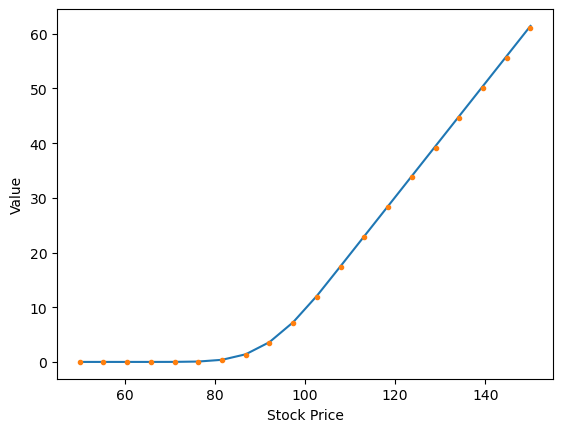

In [18]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [19]:
values = []
valuesMC = []

for stock_price in stock_prices:
    stock_min_max = stock_price
    v = lookbackPut.value(value_dt, stock_price, discount_curve, dividend_curve,
                           volatility, stock_min_max)
    v_mc = lookbackPut.value_mc(value_dt, stock_price, discount_curve, dividend_curve,
                                volatility, stock_min_max, num_paths, num_steps_per_year)
    values.append(v)
    valuesMC.append(v_mc)

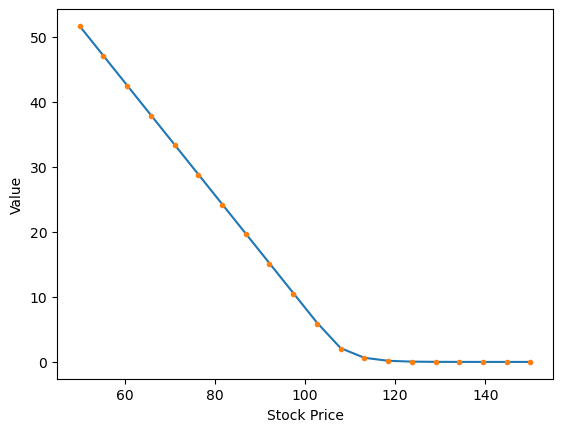

In [20]:
plt.plot(stock_prices, values)
plt.plot(stock_prices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane